# Deposit Opening Classification Project
### BAN 5753 - Mini Project 2
#### Due Date: November 29th, 2023

---

**Team 13 Members:**
- Brock Bennett
- Nathan Zlomke
- John Ramirez
- Isabella Lieberman

---

**Project Overview**:
*
In the "Deposit Opening Classification Project" for BAN 5753, our team embarks on a data-driven journey to tackle a fundamental challenge in the banking sector – predicting customer behavior regarding term deposit subscriptions. The core of this project lies in developing a sophisticated classification model that distinguishes between clients likely to subscribe and those who are not.

Our primary task involves conducting extensive Exploratory Data Analysis (EDA) on a dataset provided by XYZ Bank. This dataset, compiled from the bank's direct marketing efforts via telephone, spans from May 2008 to November 2010 and encompasses various attributes ranging from demographic details to economic indicators. Through EDA, we aim to uncover hidden patterns, correlations, and trends that can influence a customer's decision to subscribe to a term deposit.

The project's pivotal component is the creation and validation of a predictive model. This model will leverage the insights gained from EDA and employ advanced analytical techniques to forecast customer behavior. Our exploration will not be limited to a single methodology; instead, we will delve into multiple modeling approaches, including the optional use of K-means Clustering and a comparison of over four different supervised algorithms, possibly utilizing the Pyspark or Spark-Scala platforms.

An integral part of our project is to provide prescriptive recommendations based on our findings. These recommendations aim to offer actionable insights that the bank can implement in future marketing strategies.

In line with industry practices, we will document our findings and methodologies comprehensively. This documentation will include a detailed readme file, a saved model file in a serialized format for future application, and a presentation/report capturing the essence of our results and recommendations.

As we proceed, our focus will not only be on the analytical aspects but also on adhering to the best practices in AI/ML CI/CD, as demonstrated through our submission via GitHub. This project presents an opportunity for us to blend theoretical knowledge with practical application, setting the stage for real-world data science applications in the banking sector.
*

---

**Table of Contents**:

1. [Introduction](#Introduction)
2. [Data Exploration](#Data-Exploration)
3. [Model Development](#Model-Development)
4. [Results and Discussion](#Results-and-Discussion)
5. [Conclusion](#Conclusion)

---

## 1. Business Problem

- **Objective**: Classify clients on their likelihood to subscribe to a term deposit (Yes/No).
- **Exploratory Data Analysis (EDA)**: Identify trends and relationships in data (correlations, bivariate analysis, patterns, etc.).
- **Predictive Model**: Develop, test, and save models for future use. Explore various techniques and report findings.
- **Recommendations**: Provide any prescriptive insights.
- **K-Means Clustering**: Optional for bonus points.
- **Supervised Algorithms**: Compare more than four using Pyspark or Spark-Scala (bonus point).

## 2. Dataset Information

- **Source**: XYZ Bank's direct marketing campaigns via telephone.
- **Data**: `XYZ_Bank_Deposit_Data_Classification.csv` with 20 columns, covering May 2008 to November 2010.
- **Target Variable**: Customer's decision to signup for a term deposit.

## 3. Attributes Information

1. Age (Numeric)
2. Job (Categorical)
3. Marital Status (Categorical)
4. Education (Categorical)
5. Default on Credit (Categorical)
6. Housing Loan (Categorical)
7. Personal Loan (Categorical)
8. Contact Type (Categorical)
9. Last Contact Month (Categorical)
10. Last Contact Day (Categorical)
11. Last Contact Duration (Numeric)
12. Campaign Contacts (Numeric)
13. Days Since Last Contact (Numeric)
14. Previous Contacts (Numeric)
15. Outcome of Previous Campaign (Categorical)
16. Employment Variation Rate (Numeric)
17. Consumer Price Index (Numeric)
18. Consumer Confidence Index (Numeric)
19. Euribor 3 Month Rate (Numeric)
20. Number of Employees (Numeric)

## 4. Submission Requirements

- **GitHub Submission**: Introduce students to Git AI/ML CI/CD industry practices.
- **Required Files**: Data file, Pickle/saved model file, Model .py file, Readme, and PPT/Word report.

In [1]:
# Import Findspark
import findspark
findspark.init()
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col, asc,desc
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix

# Initiate a spark session

In [3]:
spark=SparkSession.builder \
.master ("local[*]")\
.appName("MiniProject2")\
.getOrCreate()
sc=spark.sparkContext
sqlContext=SQLContext(sc)

In [4]:
sc=spark.sparkContext
sqlContext=SQLContext(sc)

### The objective of the classification is to identify clients who will subscribe (yes/no) for a term deposit. (Variable y: Target function).

#### Conduct EDA to identify relationships, trends in data. 
For example: correlations, bivariate analysis of target versus input variables, facts, univariate patterns, missing data

In [6]:
#Read in file
df=spark.read \
 .option("header","True")\
 .option("inferSchema","True")\
 .option("sep",";")\
 .csv("/Users/brocktbennett/GitHub/Project Data/mini_project_2/XYZ_Bank_Deposit_Data_Classification-2.csv")
print("There are",df.count(),"rows",len(df.columns),
      "columns" ,"in the data.") 

There are 41188 rows 21 columns in the data.


In [7]:
df.toPandas().head(5)

23/11/14 10:16:09 WARN TransportClientFactory: DNS resolution succeed for brocks-mbp.home/192.168.1.172:63036 took 5039 ms


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)


In [9]:
df = df.withColumnRenamed('emp.var.rate','emp_var_rate')
df = df.withColumnRenamed('cons.price.idx','cons_price_idx')
df = df.withColumnRenamed('cons.conf.idx','cons_conf_idx')
df = df.withColumnRenamed('nr.employed','nr_employed')

#### Numerical Statistics

In [10]:
#Statistics for numerical features
numeric_features = [t[0] for t in df.dtypes if (t[1] == 'int') or(t[1] =='double')]
df.select(numeric_features).describe().toPandas().transpose()

23/11/14 10:16:49 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,0,1,2,3,4
summary,count,mean,stddev,min,max
age,41188,40.02406040594348,10.421249980934043,17,98
duration,41188,258.2850101971448,259.27924883646455,0,4918
campaign,41188,2.567592502670681,2.770013542902331,1,56
pdays,41188,962.4754540157328,186.910907344741,0,999
previous,41188,0.17296299893172767,0.49490107983928927,0,7
emp_var_rate,41188,0.08188550063178966,1.57095974051703,-3.4,1.4
cons_price_idx,41188,93.5756643682899,0.5788400489540823,92.201,94.767
cons_conf_idx,41188,-40.502600271918276,4.628197856174573,-50.8,-26.9
euribor3m,41188,3.621290812858533,1.7344474048512595,0.634,5.045


#### Categorical Statistics

In [11]:
categorical_features = list(set(df.columns) - set(numeric_features))

In [12]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F

# Assuming 'categorical_features' is a list of categorical column names
categorical_stats = []

for feature in categorical_features:
    distinct_count = df.select(feature).distinct().count()
    mode = df.groupBy(feature).count().orderBy(col("count").desc()).first()[feature]
    frequency_counts = df.groupBy(feature).count().orderBy(F.col('count').desc())
    percentage_counts = frequency_counts.groupBy(feature).agg(F.count(feature).alias('count'), (F.count(feature) / df.count() * 100).alias('percentage')).orderBy(F.col('count').desc())

    categorical_stats.append({
        'feature': feature,
        'distinct_count': distinct_count,
        'mode': mode,
        'categ_freq': frequency_counts.collect(),
        'categ_percntg':percentage_counts.collect()
    })

    
    # Calculate percentage directly without modifying the DataFrame
    
    # Now you can use percentage_counts as needed, and 'percentage' is a calculated element


In [13]:
#Percentage isn't calculated correctly, and want to find how to make embedded values look more presentable...i.e., tabular
pd.set_option('display.max_colwidth', None)
categorical_stats_df

NameError: name 'categorical_stats_df' is not defined

### At first glance, doesn't appear any missing variables, perform more EDA and see

### Any imputation necessary?

### Target Variable Distribution

In [100]:
df.groupBy('y').count().show()

+---+-----+
|  y|count|
+---+-----+
| no|36548|
|yes| 4640|
+---+-----+


In [101]:
4640/36548

0.126956331399803

(Mental note:  Isn't there a certain case in machine learning when you are attempting to predict a minority case?  like fraud or spam cases?)

In [106]:
len(df.columns)

21

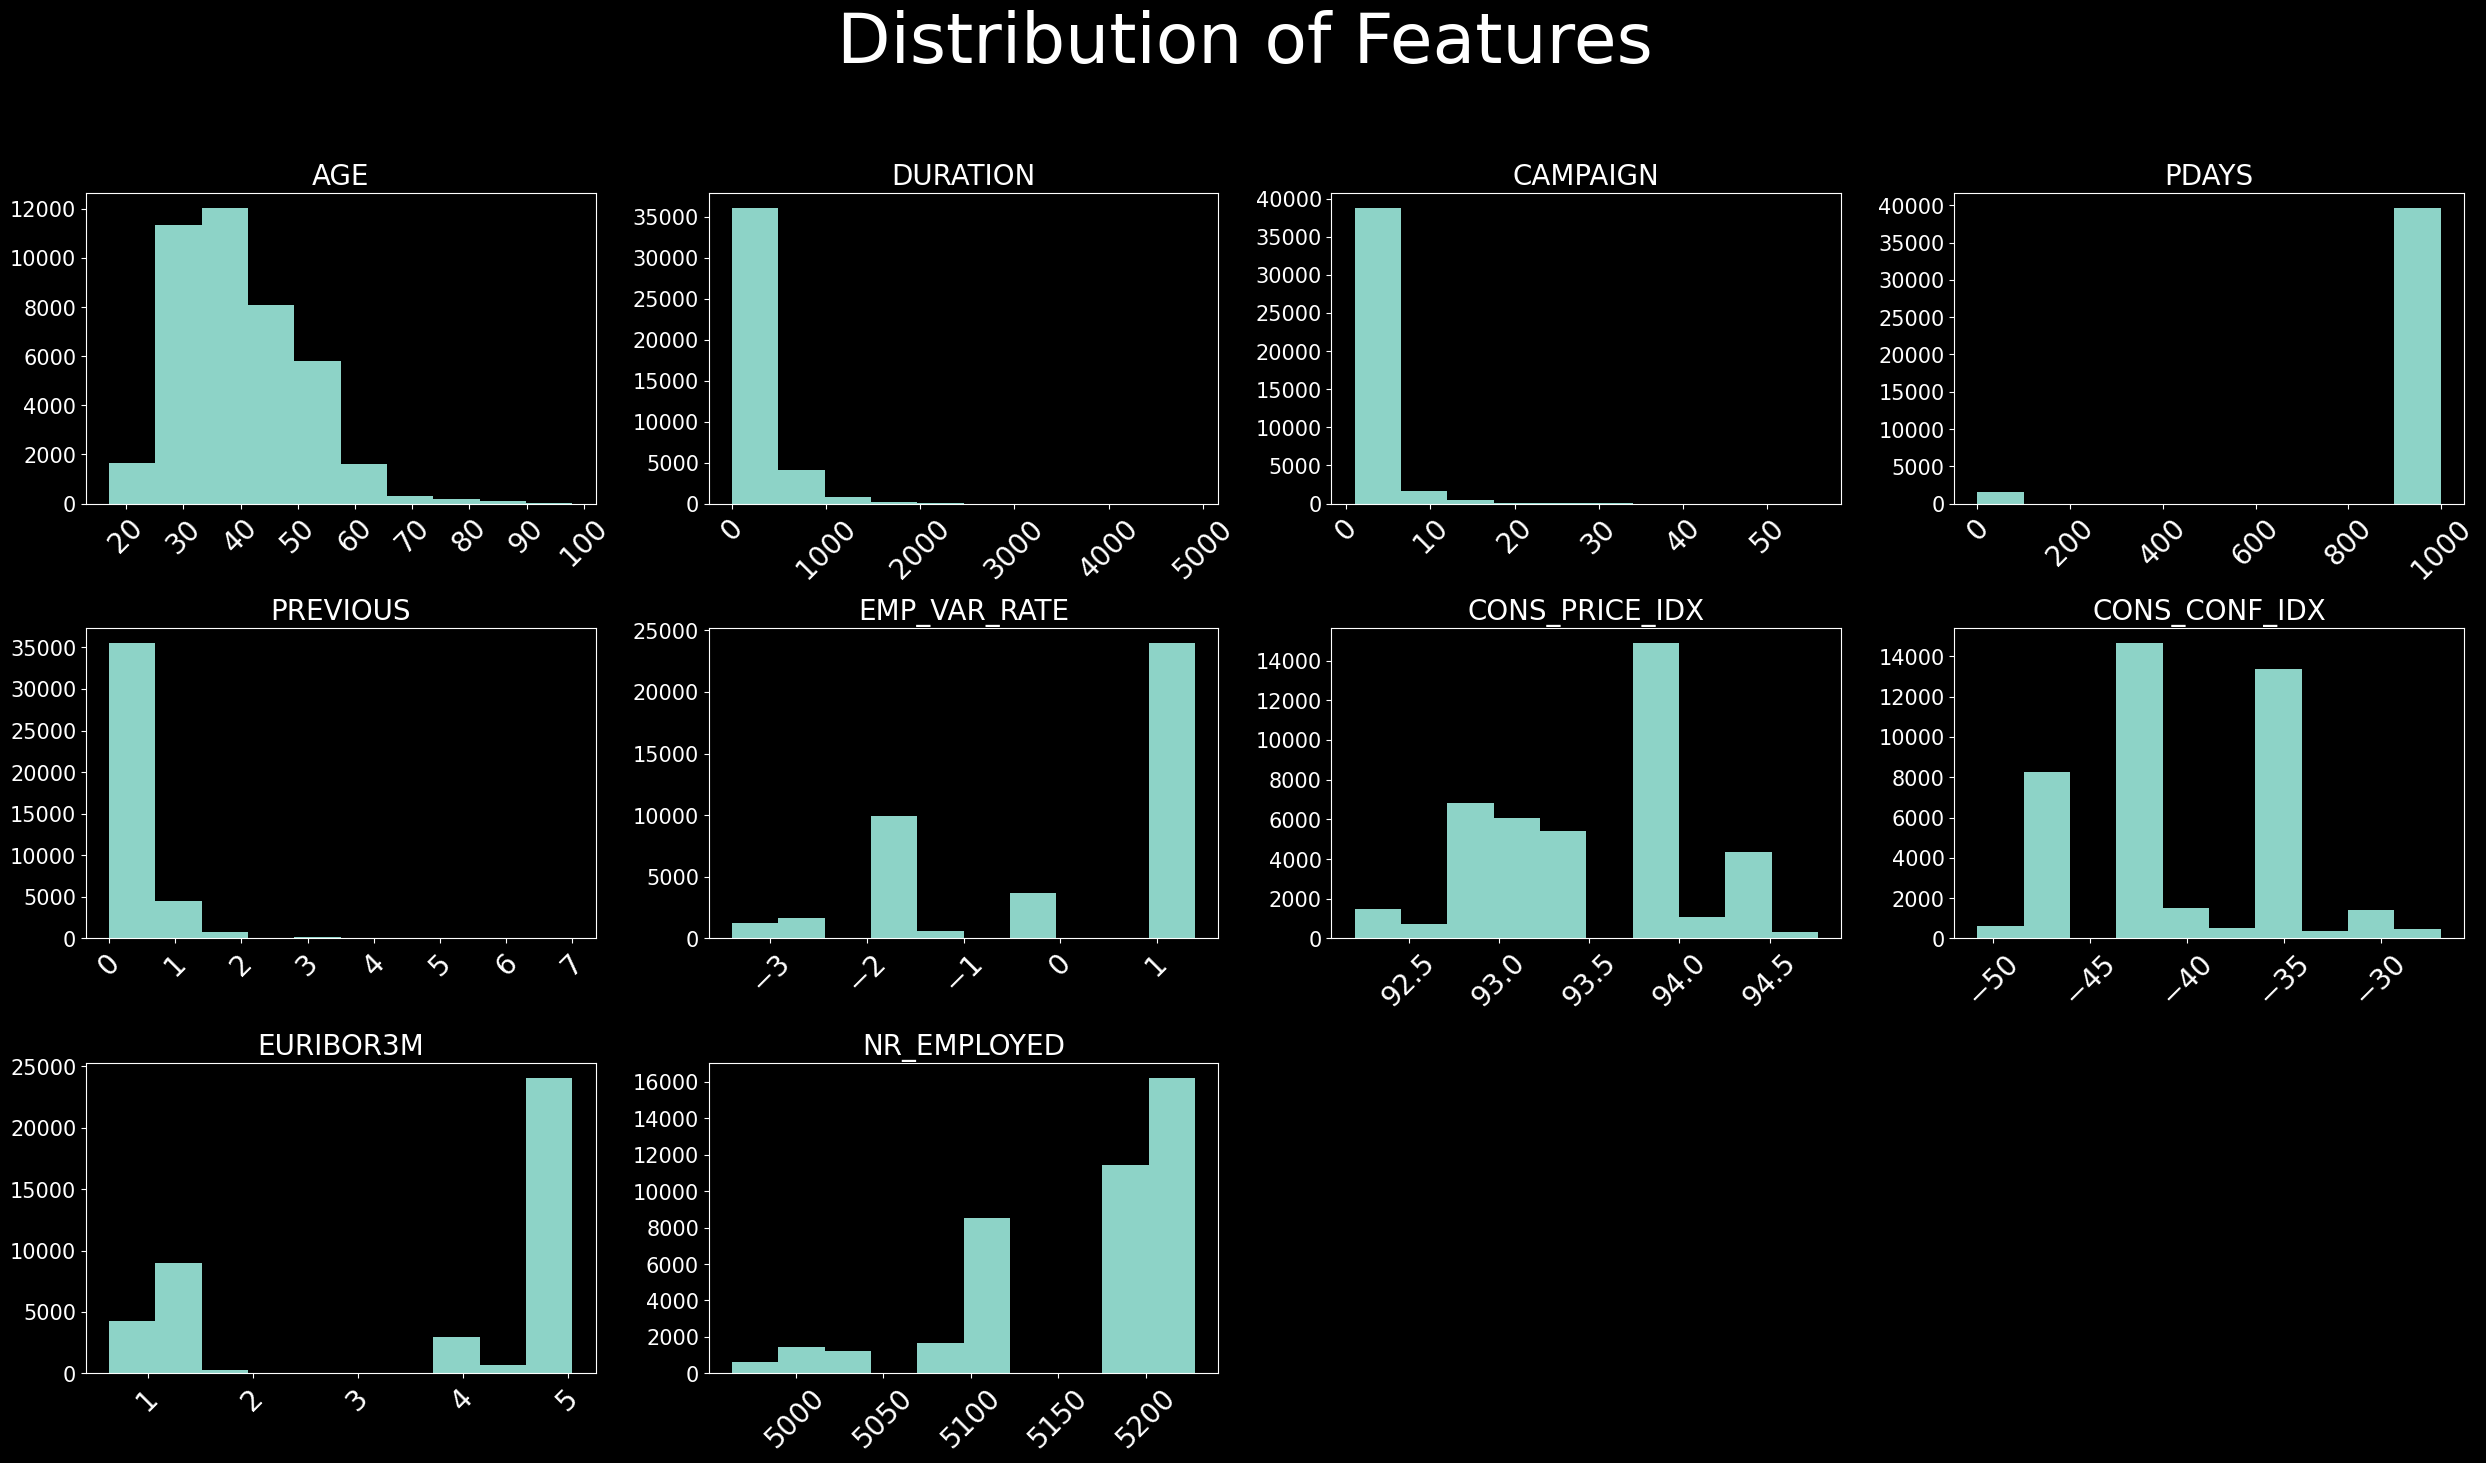

In [108]:
from matplotlib import cm
fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Distribution of Features", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(df.toPandas().describe().columns, range(1,len(df.columns))):
    ax = fig.add_subplot(3,4,num)
    ax.hist(df.toPandas()[col])
    plt.style.use('dark_background') 
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()